In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

'''import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
#import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image
import seaborn as sns
from sklearn import metrics
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split
import torch.optim as optim
from torchvision import transforms 
from torchvision.datasets import ImageFolder
import timm

#from keras.models import load_model
#from keras.preprocessing import image

D:\Projects\Deepfakes detection\kaggle\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
!pip install tqdm


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install numpy
!pip install pandas
!pip install glob
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install timm
!pip install torch

  Using cached numpy-2.2.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.3-cp313-cp313-win_amd64.whl (12.6 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement glob (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for glob


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.0 MB 9.9 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.0 MB 11.0 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 11.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 10.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ----------------------------------- ---- 2.4/2.6 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 11.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 8.2 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.1 MB 10.4 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.1 MB 11.0 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.1 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 11.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   -- ------------------------------------- 2.4/41.0 MB 11.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/41.0 MB 11.8 MB/s eta 0:00:04
   ------ --------------------------------- 7.1/41.0 MB 11.8 MB/s eta 0:00:03
   --------- ------------------------------ 9.7/41.0 MB 11.8 MB/s eta 0:00:03
   ------------ --------------------------- 12.3/41.0 MB 11.8 MB/s eta 0:00:03



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ----------------- ---------------------- 1.0/2.4 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 9.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 2.4/204.1 MB 11.8 MB/s eta 0:00:18
    --------------------------------------- 4.7/204.1 MB 11.8 MB/s eta 0:00:17
   - -------------------------------------- 7.1/204.1 MB 11.8 MB/s eta 0:00:17
   - -------------------------------------- 9.7/204.1 MB 11.8 MB/s eta 0:00:17
   -- ------------------------------------- 12.1/204.1 MB 11.8 MB/s eta 0:00:17
   -- ------------------------------------- 14.7/204.1 MB 11.8 MB/s eta 0:00:17
   --- ------------------------------------ 17.0/204.1 MB 11.8 MB/s eta 0:00:16
   --- ------------------------------------ 19.7/204.1 MB 11.8 MB/s eta 0:00:16
   ---- ----------------------------------- 22.0/204.1 MB 11.8 MB/s eta 


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
main_path = './data/real_vs_fake/real-vs-fake'

train_dir = './data/real_vs_fake/real-vs-fake/train'
valid_dir = './data/real_vs_fake/real-vs-fake/valid'
test_dir = './data/real_vs_fake/real-vs-fake/test'

In [3]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(valid_dir))
print("Test_dir Subfolders: ", os.listdir(test_dir))

Train_dir Subfolders:  ['fake', 'real']
Valid_dir Subfolders:  ['fake', 'real']
Test_dir Subfolders:  ['fake', 'real']


In [4]:
images_df = {
    "folder":[],
    "image_path":[],
    "label":[]
}

for folder in os.listdir(main_path): #iterate on each train, valid and test folder
    for label in os.listdir(main_path + "/" + folder): #iterate on fake and real folders (labels)
        for img in glob.glob(main_path + "/" + folder + "/" + label + "/*.jpg"):
            images_df["folder"].append(folder)
            images_df["image_path"].append(img)
            images_df["label"].append(label)

In [5]:
images_df = pd.DataFrame(images_df)
images_df

,folder,image_path,label
0,test,./data/real_vs_fake/real-vs-fake/test/fake\002...,fake
1,test,./data/real_vs_fake/real-vs-fake/test/fake\008...,fake
2,test,./data/real_vs_fake/real-vs-fake/test/fake\009...,fake
3,test,./data/real_vs_fake/real-vs-fake/test/fake\00F...,fake
4,test,./data/real_vs_fake/real-vs-fake/test/fake\00J...,fake
...,...,...,...
139995,valid,./data/real_vs_fake/real-vs-fake/valid/real\69...,real
139996,valid,./data/real_vs_fake/real-vs-fake/valid/real\69...,real
139997,valid,./data/real_vs_fake/real-vs-fake/valid/real\69...,real
139998,valid,./data/real_vs_fake/real-vs-fake/valid/real\69...,real


In [6]:
real_grouped_df = images_df[images_df['label'] == "real"].groupby('folder')
fake_grouped_df = images_df[images_df['label'] == "fake"].groupby('folder')

In [22]:
real_grouped_df.size()

folder
test     10000
train    50000
valid    10000
dtype: int64

In [23]:
fake_grouped_df.size()

folder
test     10000
train    50000
valid    10000
dtype: int64

In [7]:
train_transforms = transforms.Compose([
    transforms.Resize((299, 299)),  
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    #transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)), 
    transforms.ToTensor(),
    #transforms.RandomErasing(p=0.3), 
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])



valid_test_transforms = transforms.Compose([
    transforms.Resize((299, 299)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Keep consistent with training
])

In [8]:
train_ds = ImageFolder(root=train_dir, transform=train_transforms)
valid_ds = ImageFolder(root=valid_dir, transform=valid_test_transforms)
test_ds = ImageFolder(root=test_dir, transform=valid_test_transforms)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True) 
valid_loader = DataLoader(valid_ds, batch_size=64, shuffle=False)  
test_loader = DataLoader(test_ds, batch_size=64, shuffle=False)  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.92941177].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9372549..0.9137255].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.90588236..0.78039217].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.79607844].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..0.7176471].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8901961..0.77254903].
Clip

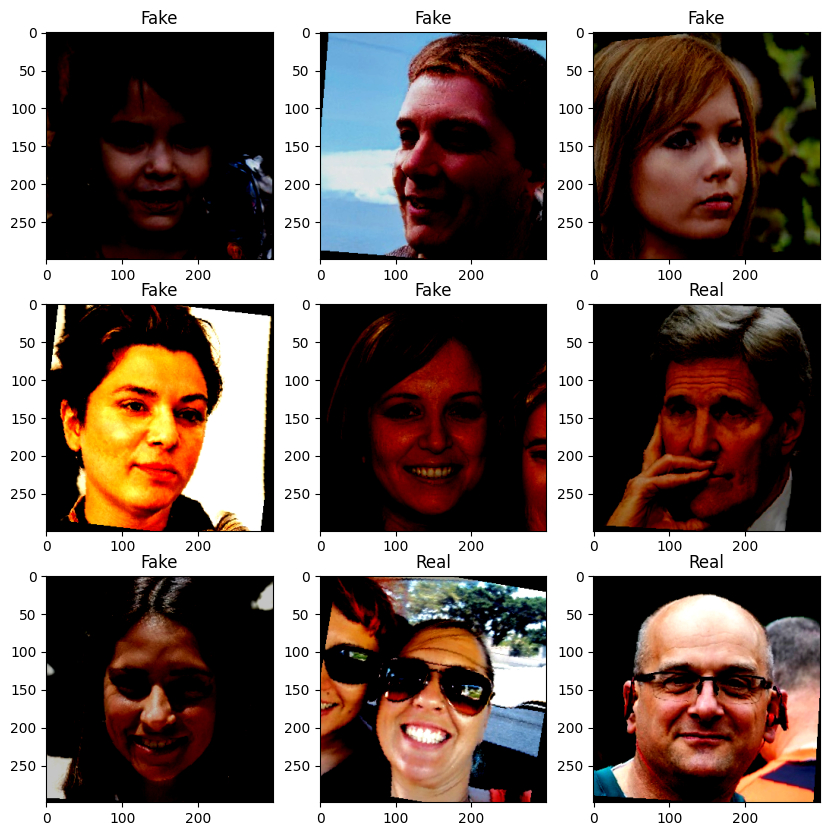

In [11]:
import matplotlib.pyplot as plt
import torch

def plot_im(img,lbl):
    plt.figure(figsize=(10,10))
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        img = images[i].permute(1,2,0)     # orig tensor: (C,H,W)--> (H,W,C)
        plt.imshow(img.numpy())
        if lbl[i] == 0:
            plt.title("Fake")
        else:
            plt.title("Real")

batch = next(iter(train_loader))
images, labels = batch
plot_im(images, labels)


In [31]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ------- -------------------------------- 0.8/4.0 MB 3.2 MB/s eta 0:00:02
   ---------------------------- ----------- 2.9/4.0 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 7.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 GB 10.1 MB/s eta 0:04:30
   ---------------------------------------- 0.0/2.7 GB 11.0 MB/s eta 0:04:08
   ---------------------------------------- 0.0/2.7 GB 11.1 MB/s eta 0:04:05
   ---------------------------------------- 0.0/2.7 GB 9.1 MB/s eta 0:05:00
   ---------------------------------------- 0.0/2.7 GB 9.2 MB/s eta 0:04:55
   ---------------------------------------- 0.0/2.7 GB 7.7 MB/s eta 0:05:53
   ---------------------------------------- 0.0

  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
torch.cuda.is_available()

True

In [1]:
import timm
import torch
import torch.nn as nn

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Xception model (without automatic pretraining)
model = timm.create_model("xception", pretrained=False)
model

D:\Projects\Deepfakes detection\kaggle\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
D:\Projects\Deepfakes detection\kaggle\Lib\site-packages\timm\models\_factory.py:126: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(


Xception(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU(inplace=True)
  (block1): Block(
    (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (rep): Sequential(
      (0): SeparableConv2d(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): SeparableConv2d(
        (conv1): Conv

In [2]:
# Load manually downloaded model weights
model_path = "./xception_weights2.pth"

# Get the number of input features for the final FC layer
num_features = model.fc.in_features  # ✅ Change from `classifier` to `fc`

# Replace the FC layer with a binary classification head
model.fc = nn.Linear(num_features, 1)  # ✅ Replace the last layer for binary classification

model.load_state_dict(torch.load(model_path, map_location=device), strict=False)

# Move model to device
model = model.to(device)

print(model)

Xception(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU(inplace=True)
  (block1): Block(
    (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (rep): Sequential(
      (0): SeparableConv2d(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): SeparableConv2d(
        (conv1): Conv

In [14]:
'''criterion = nn.BCEWithLogitsLoss()  # Binary Cross Entropy for binary classification
#optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)'''
criterion = nn.BCEWithLogitsLoss()  # Binary Cross Entropy for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5)

In [16]:
!pip install accelerate


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from accelerate import Accelerator
import torch
from torch.amp import autocast  # ✅ Correct import

# Initialize Accelerator
accelerator = Accelerator(mixed_precision="fp16")
device = accelerator.device

# Prepare model, optimizer, and dataloader
model, optimizer, train_loader = accelerator.prepare(model, optimizer, train_loader)

num_epochs = 1

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    count = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device, dtype=torch.float32)
        count += 1
        optimizer.zero_grad()

        # ✅ Autocast is handled by `Accelerate`, no need for device_type
        with autocast('cuda'):
            outputs = model(images)
            loss = criterion(outputs.squeeze(1), labels)

        accelerator.backward(loss)
        optimizer.step()

        total_loss += loss.item()
        print(count)
        # ✅ Compute accuracy
        predictions = torch.sigmoid(outputs).squeeze(1) > 0.5  # Convert logits to binary predictions
        correct += (predictions == labels).sum().item()
        total += labels.size(0)
        
    # ✅ Compute average loss & accuracy
    avg_loss = total_loss / len(train_loader)
    train_accuracy = correct / total * 100

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [38]:
def evaluate(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    count = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device, dtype=torch.float32)
            outputs = model(images).squeeze(1)
            preds = torch.sigmoid(outputs) > 0.5  # Convert logits to binary class
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            count += 1
            print(count)
    accuracy = correct / total
    return accuracy

val_acc = evaluate(model, test_loader)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [16]:
torch.save(model.state_dict(), "xception_weights2.pth")


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision import transforms 

img=mpimg.imread('testframe.jpg')

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((299, 299)),  # Xception input size
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize for 3 channels
])
img_tensor = transform(img).unsqueeze(0).to(device)  

with torch.no_grad():
        output = model(img_tensor).squeeze(1)
        prediction = torch.sigmoid(output).item() 

label = "Real" if prediction > 0.5 else "Fake"
label

'Real'